In [1]:
from hdimvis.data_fetchers.DataFetcher import DataFetcher
from hdimvis.metrics.distance_measures.euclidian_and_manhattan import manhattan,euclidean
from hdimvis.algorithms.spring_force_algos.chalmers96_algo.Chalmers96 import Chalmers96
from hdimvis.create_low_d_layout.LayoutCreation import LayoutCreation
from hdimvis.visualise_layouts_and_metrics.plot import show_layout, show_generation_metrics
from sklearn.decomposition import PCA
from time import perf_counter
import numpy as np
from pathlib import Path
from definitions import PROJECT_ROOT
import pickle

####################
Fetching the "coil20" dataset
####################
Dataset loaded
Dataset shape: (1440, 1024)
####################
####################
A 2D layout of the "coil20" dataset will be created 
using the "Chalmers' 1996" algorithm
####################
The HD distance measure used is: manhattan
####################
####################
No metrics will be collected during layout creation. 
To change this use the 'metric collection' parameter of the layout 
####################
All stress calculations will be performed using the euclidian norm
####################
Spring constant is set to  0.5 
Damping constant is set to 0 
Spring constant scaling factor is set to 0.03333333333333333 
####################


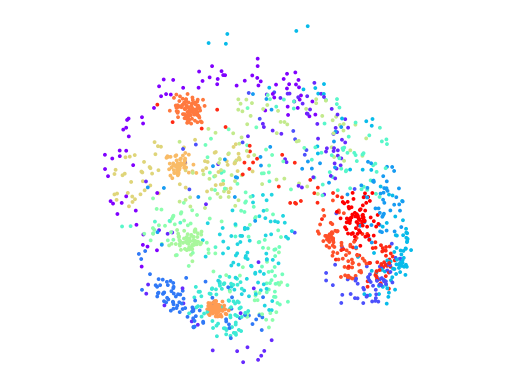

In [5]:
# metric_collection = {'Average speed': 1, "Stress": 5}

dataset = DataFetcher.fetch_data('coil20')
Xld = PCA(n_components=2, whiten=False, copy=True).fit_transform(dataset.data).astype(np.float64)
Xld *= 10/np.std(Xld)

# show_layout(positions=Xld, labels=dataset.labels, title="PCA")

# zero_initial = np.zeros((dataset.data.shape[0], 2))
# random_initial =  10*np.random.randn(dataset.data.shape[0], 2)

algo96 = Chalmers96(dataset=dataset,  distance_fn=manhattan, initial_layout=Xld,
                    damping_constant=0, spring_constant=0.5,
                    use_knnd=False, sample_set_size=10, neighbour_set_size=5)


layout = LayoutCreation.create_layout(algo96, optional_metric_collection=None, num_iters=100)
show_layout(layout, use_labels=True)